# 11-experiment-three-cogsci

## Analysis

In [6]:
# Analytical Tools
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# General Utilities
import itertools
import json
import pprint

# Custom Utilities
import utilities.plotting as plotting
import utilities.describe as describe

# Some settings
log = pprint.pprint
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.mode.chained_assignment = None

### Import Data & Define Constants

In [7]:
GROUPS = 3
QUESTIONS = 4
JUDGMENTS = 4
SCORE_THRESHOLD = 240.9

data = pd.read_pickle('data/responses.pkl')
data.head()

,id,consent,attention,g0_q0_score,g0_q0_index,g0_q0_j0,g0_q0_j1,g0_q0_j2,g0_q0_j3,g0_q1_score,...,g2_q2_j0,g2_q2_j1,g2_q2_j2,g2_q2_j3,g2_q3_score,g2_q3_index,g2_q3_j0,g2_q3_j1,g2_q3_j2,g2_q3_j3
0,hu18z57qr2ja4v6jh24c57fk0b5ftdqs,1,1,22,35,5,1,0,1,27,...,4,0,5,2,2395,36,4,0,3,3
1,xev0ec5nfz6bfwq1h4puuscnk0eg8ck8,1,1,40,18,3,0,2,1,28,...,3,4,3,3,2416,2,3,2,3,4
2,upfop1hxok2r4hynbr5yfwty3q5628wr,1,1,28,2,5,0,5,2,19,...,2,5,1,2,2404,40,1,2,4,3
3,goxzca1lx6vlbzmf9la861fhqlmtxlmn,1,1,32,27,4,2,4,3,41,...,5,0,4,3,2398,16,2,1,2,2
4,j06j83a97loyc5won1rk9hg46qrwnzbs,1,1,24,10,6,0,2,3,22,...,1,5,1,0,2388,8,4,0,4,1


### Analysis

In [8]:
for g_num in range(GROUPS):
    for j_num in range(JUDGMENTS):
        headings = []
        for q_num in range(QUESTIONS):
            headings.append('g{}_q{}_j{}'.format(g_num, q_num, j_num))
        
        rating_mean = data[headings].mean(axis=1)
        data['g{}_j{}_mean'.format(g_num, j_num)] = rating_mean

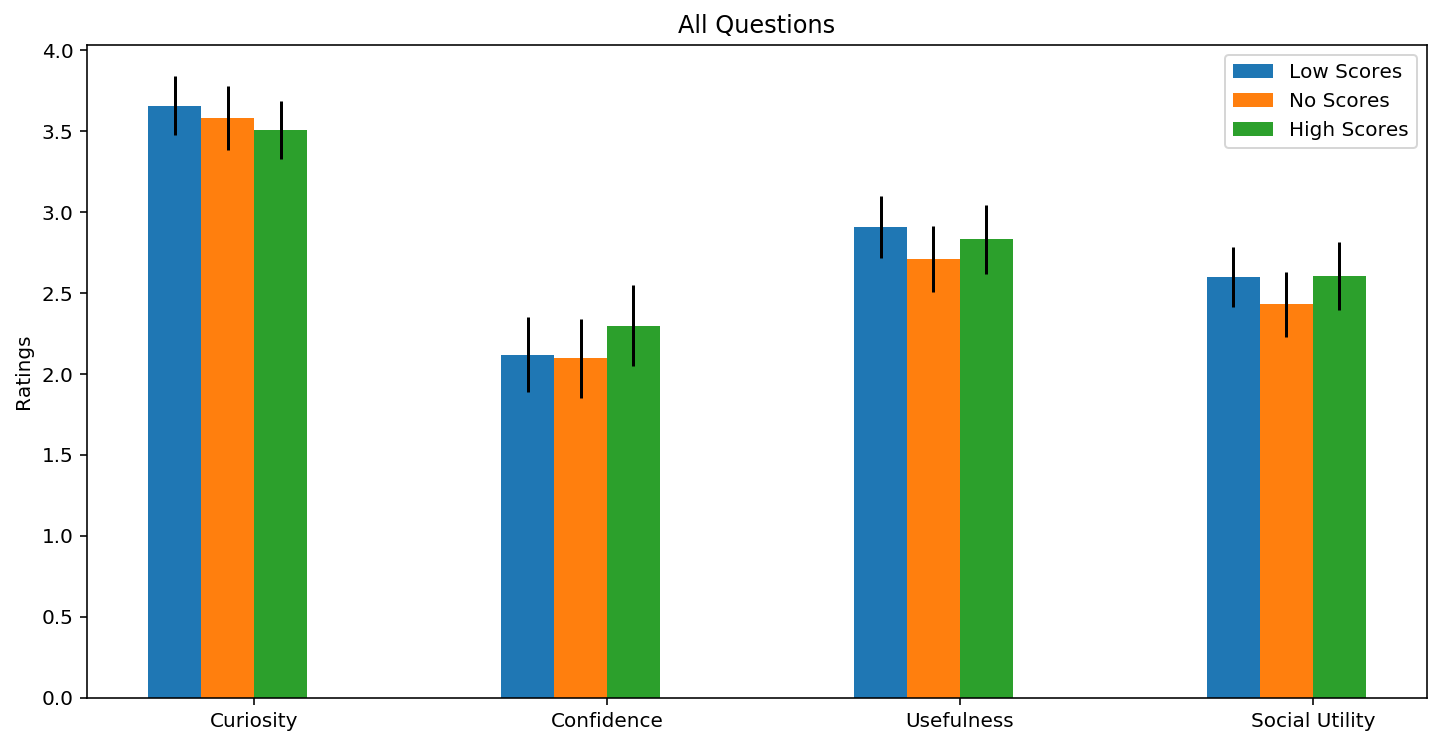

[3.657608695652174, 2.119565217391304, 2.907608695652174, 2.597826086956522]
[3.5815217391304346, 2.097826086956522, 2.7119565217391304, 2.4293478260869565]
[3.505434782608696, 2.2989130434782608, 2.8315217391304346, 2.6032608695652173]


In [13]:
PLOTTING_OPTIONS = {
    'ylabel': 'Ratings',
    'ticks': ['Curiosity', 'Confidence', 'Usefulness','Social Utility'],
    'legend': ['Low Scores', 'No Scores', 'High Scores'],
    'title': 'All Questions',
    'size': (12, 6)
}

g0_means, g0_errs = [], []
g1_means, g1_errs = [], []
g2_means, g2_errs = [], []

for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g1_values = data['g1_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    g0_means.append(g0_values.mean())
    g1_means.append(g1_values.mean())
    g2_means.append(g2_values.mean())
    g0_errs.append(stats.sem(g0_values))
    g1_errs.append(stats.sem(g1_values))
    g2_errs.append(stats.sem(g2_values))
    
plotting.plot_triple_bar(g0_means, g0_errs, g1_means, g1_errs, 
                         g2_means, g2_errs, **PLOTTING_OPTIONS)

print(g0_means)
print(g1_means)
print(g2_means)

In [10]:
print('Low & High')
for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))
print()
print('Low & None')
for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g2_values = data['g1_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))
print()
print('None & High')
for j_num in range(JUDGMENTS):
    g0_values = data['g1_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))

Low & High
Curiosity: t = 0.831, p = 0.41, Δ = -0.152 (0 greater)
Confidence: t = -1.13, p = 0.264, Δ = 0.179 (1 greater)
Usefulness: t = 0.39, p = 0.698, Δ = -0.0761 (0 greater)
Social Utility: t = -0.0378, p = 0.97, Δ = 0.00543 (1 greater)

Low & None
Curiosity: t = 0.531, p = 0.598, Δ = -0.0761 (0 greater)
Confidence: t = 0.132, p = 0.895, Δ = -0.0217 (0 greater)
Usefulness: t = 1.33, p = 0.191, Δ = -0.196 (0 greater)
Social Utility: t = 1.53, p = 0.132, Δ = -0.168 (0 greater)

None & High
Curiosity: t = 0.522, p = 0.604, Δ = -0.0761 (0 greater)
Confidence: t = -1.3, p = 0.199, Δ = 0.201 (1 greater)
Usefulness: t = -0.769, p = 0.446, Δ = 0.12 (1 greater)
Social Utility: t = -1.21, p = 0.233, Δ = 0.174 (1 greater)
